# Problem Statement
There is a big mall in some specific city contains informations of its clients. The clients that subscribe to the membership cards.When a client subscribe to the card they provide there information like

| Gender || Age || Annual Income(K$) |

And client use the card for shoping inside the mall so mall has obtained the column as

|Spending Score (1-100)|

Spending Score is the column that the mall has computed for each of there client based on several criteria like there annual income, Number of days in week the client shown up in the mall, Amount they have spent in a year etc.Based on such criteria they have computed the last colum as a score of 1 to 100.

Closer to Spending score 1 lesser the client has spends
Closer to Spending score 100  the more client has spends

#### Our task is to Segment the clients based on there Annual Income and Spending Score. 



In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Loading data set
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

## Kmeans ( using Elbow Method)

In [4]:
#Using Elbow method for finding optimal clusters
from sklearn.cluster import KMeans

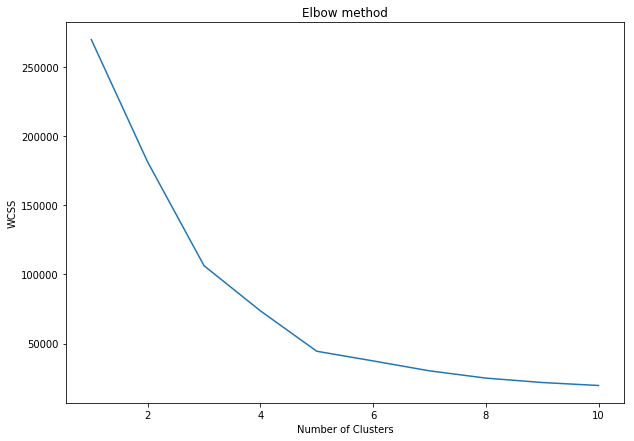

In [5]:
wcss = []  #with in cluster sum of squares
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init = 'k-means++', n_init=10, max_iter=300, random_state=101).fit(X)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Optimal number of cluster are 5
kmean = KMeans(n_clusters=5,init = 'k-means++', n_init=10, max_iter=300, random_state=101)
y_kmean = kmean.fit_predict(X)
#fit_predict = fit + creating clusters vectors

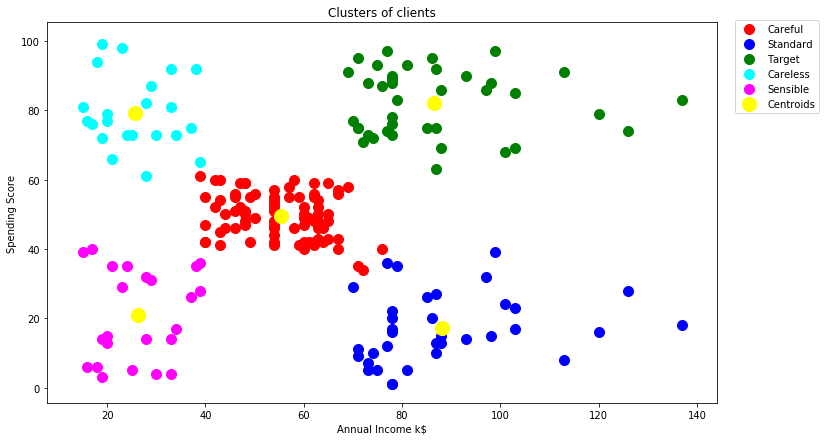

In [22]:
#Visualizing the clusters
plt.figure(figsize=(12,7))
plt.scatter(X[y_kmean==0, 0], X[y_kmean==0, 1], s=100, c = 'red', label ='Careful')
plt.scatter(X[y_kmean==1, 0], X[y_kmean==1, 1], s=100, c = 'blue', label ='Standard')
plt.scatter(X[y_kmean==2, 0], X[y_kmean==2, 1], s=100, c = 'green', label ='Target')
plt.scatter(X[y_kmean==3, 0], X[y_kmean==3, 1], s=100, c = 'cyan', label ='Careless')
plt.scatter(X[y_kmean==4, 0], X[y_kmean==4, 1], s=100, c = 'magenta', label ='Sensible')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=200, c = 'yellow', label ='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.show()

# Hierarchical Method ( Using Dendrogram)

In [8]:
#Using dendogram method to find number of cluster
import scipy.cluster.hierarchy as sch

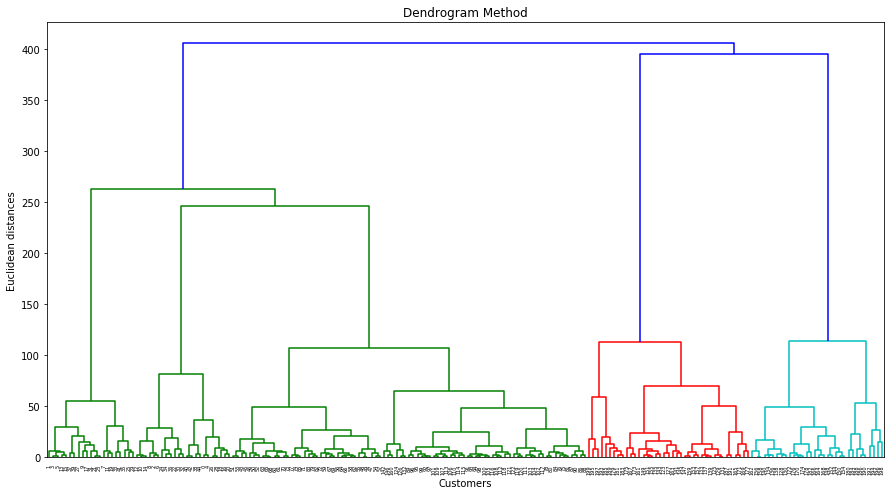

In [11]:
#Inside the hierarchical clustering linkage is the algorithm itself.
#we are using the 'ward' method here which is generally use to minimise the variance in each cluster 
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.rcParams['figure.figsize'] = 15,8
plt.title('Dendrogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
#Number of cluster are 5
#Fitting Data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity ='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

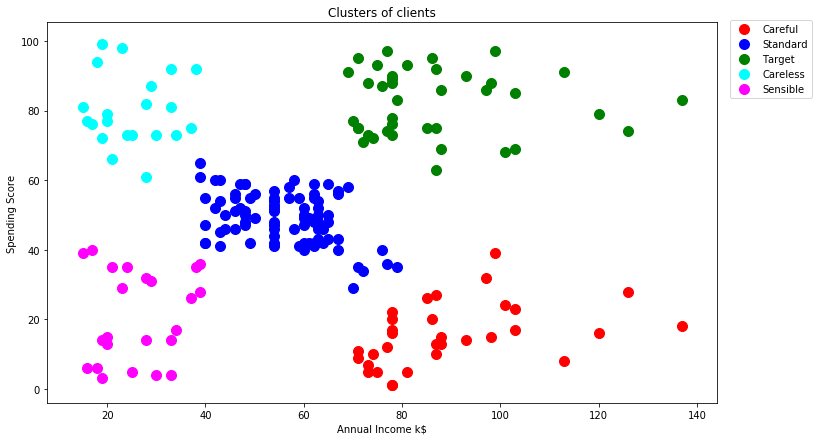

In [28]:
#Visualizing the clusters
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c = 'red', label ='Careful')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c = 'blue', label ='Standard')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c = 'green', label ='Target')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c = 'cyan', label ='Careless')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c = 'magenta', label ='Sensible')

plt.title('Clusters of clients')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1.15, 1.02))
plt.show()

# Results are same